Based on:

Optimization with Cython: Ising Models (Part 1)
https://www.youtube.com/watch?v=rN7g4gzO2sk&ab_channel=JakeVanderplas

Optimization with Cython: Ising Models (Part 2)
https://www.youtube.com/watch?v=LOzcSuw3yOY&ab_channel=JakeVanderplas 

https://linuxpip.org/git-error-fatal-authentication-failed/#The_fatal_Authentication_failed_error_message

To add all the changes you've made:

git add .

To commit them:

git commit -m "MY MESSAGE HERE" #-m is the message flag

You can put those steps together like this:

git commit -a -m "MY MESSAGE HERE"

To push your committed changes from your local repository to your remote repository:

git push origin master

In [1]:


import numpy as np

def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))

random_spin_field(10,10)

array([[-1,  1,  1,  1,  1, -1,  1,  1,  1, -1],
       [-1,  1, -1, -1,  1,  1,  1, -1,  1,  1],
       [-1,  1,  1,  1, -1, -1, -1,  1, -1,  1],
       [ 1,  1,  1, -1,  1, -1, -1,  1, -1,  1],
       [-1,  1, -1, -1,  1,  1, -1,  1,  1,  1],
       [-1, -1,  1, -1, -1, -1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1,  1,  1],
       [ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1]])

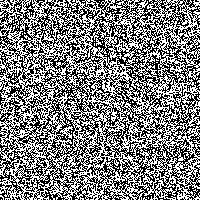

In [2]:
from PIL import Image

def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255)) #0..255

display_spin_field(random_spin_field(200, 200))

In [3]:
def ising_step(field, beta = 0.4):
    N, M  = field.shape
    
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):        
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field

def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1,n+2):
        for j in range(m-1, m+2):
            if i==n and j==m:
                continue
            total += field[i % N, j % M]
    
    dE = 2* field[n,m]*total
    
    if dE <=0:
        field[n,m] *= -1
    elif np.exp(-dE *beta ) > np.random.rand():
        field[n,m] *= -1

In [4]:
display_spin_field(ising_step(random_spin_field(30,30)))

## Animate Sequence with ipywidgets

In [5]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame=(0, len(images)-1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [6]:
images = [random_spin_field(50,50)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
    
display_ising_sequence(images)

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

<function __main__.display_ising_sequence.<locals>._show(frame=(0, 50))>